In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
data=pd.read_csv(r"D:\Data_Science & Analytics\DataSets\StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**1.Find out how many males and females participated in the test**

In [7]:
data.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

**2. What do you think about the students' parental level of education?**

In [19]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

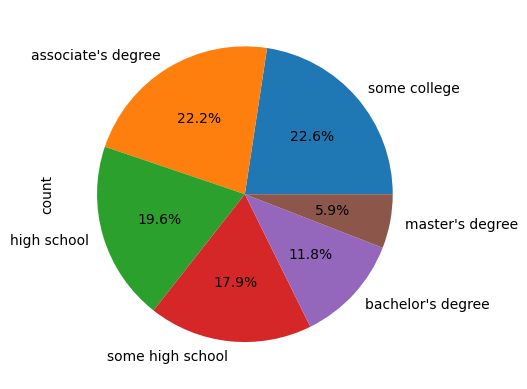

In [23]:
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

**3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course**


In [94]:
grouped_data = data.groupby(['gender', 'test preparation course'])
average_scores = grouped_data[['math score', 'reading score', 'writing score']].mean()
average_scores

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

**students(female and male) who completed the test preparation course scored higher in all three subjects**

<Axes: title={'center': 'writing Score'}, xlabel='test preparation course', ylabel='writing score'>

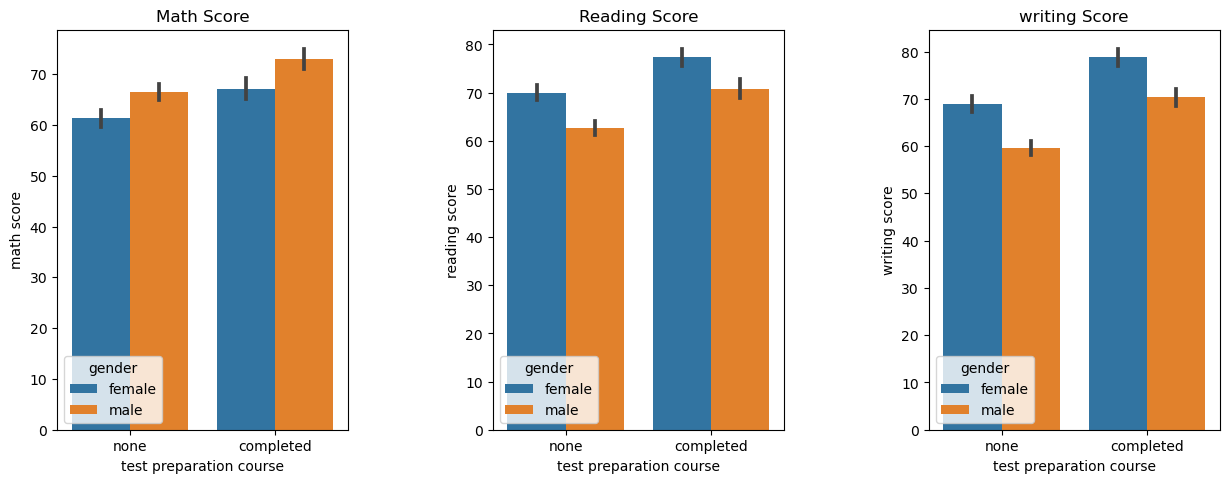

In [66]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)
plt.subplot(131)
plt.title('Math Score')
sns.barplot(hue='gender',y='math score',x='test preparation course',data=data)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(hue='gender',y='reading score',x='test preparation course',data=data)
plt.subplot(133)
plt.title('writing Score')
sns.barplot(hue='gender',y='writing score',x='test preparation course',data=data)

**4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course**

In [100]:
grouped_data = data.groupby(['gender', 'test preparation course'])
std_scores = grouped_data[['math score', 'reading score', 'writing score']].std()
std_scores
##higher standard deviation indicates greater variablity in scores

math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284

**5.The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.**


In [103]:
# Calculate the math score threshold for the top 25%
math_score_threshold = data['math score'].quantile(0.75) #quantile function is to find the score below which 25% of the data falls.

# Identify the students in the top 25% based on math score
top_25_percent_students = data[data['math score'] >= math_score_threshold]

# Now, you can apply the bonus points to these students
# For example, let's add 5 bonus points to their math score
bonus_points = 5
top_25_percent_students['math_score_with_bonus'] = top_25_percent_students['math score'] + bonus_points

# Display or use the updated dataframe with bonus points
top_25_percent_students[['math score', 'math_score_with_bonus']]

C:\Users\Anna Sani\AppData\Local\Temp\ipykernel_4492\198484364.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_percent_students['math_score_with_bonus'] = top_25_percent_students['math score'] + bonus_points


,math score,math_score_with_bonus
414,77,82
415,77,82
416,77,82
417,77,82
418,77,82
...,...,...
995,99,104
996,100,105
997,100,105
998,100,105
